In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
rain = pd.read_csv("IDCJAC0009_086338_1800_Data.csv")
foot_traffic = pd.read_csv("July_2022.csv")

## Rain clean

In [3]:
rain

,Product code,Bureau of Meteorology station number,Year,Month,Day,Rainfall amount (millimetres),Period over which rainfall was measured (days),Quality
0,IDCJAC0009,86338,2013,1,1,NaN,NaN,NaN
1,IDCJAC0009,86338,2013,1,2,NaN,NaN,NaN
2,IDCJAC0009,86338,2013,1,3,NaN,NaN,NaN
3,IDCJAC0009,86338,2013,1,4,NaN,NaN,NaN
4,IDCJAC0009,86338,2013,1,5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3517,IDCJAC0009,86338,2022,8,19,12.4,1.0,N
3518,IDCJAC0009,86338,2022,8,20,4.4,1.0,N
3519,IDCJAC0009,86338,2022,8,21,0.0,1.0,N
3520,IDCJAC0009,86338,2022,8,22,0.0,1.0,N


In [4]:
rain.columns


Index(['Product code', 'Bureau of Meteorology station number', 'Year', 'Month',
       'Day', 'Rainfall amount (millimetres)',
       'Period over which rainfall was measured (days)', 'Quality'],
      dtype='object')

In [5]:
rain = rain.drop(labels=['Product code', 'Bureau of Meteorology station number'], axis=1)

In [6]:
def make_date_col(df):
    df["date"] = df['Day'].astype(str) + "/" + df['Month'].astype(str) + "/" + df['Year'].astype(str)
    df["date"] = pd.to_datetime(df["date"], format="%d/%m/%Y")
    return df['date']

In [7]:
rain["date"] = make_date_col(rain)

In [8]:
rain

,Year,Month,Day,Rainfall amount (millimetres),Period over which rainfall was measured (days),Quality,date
0,2013,1,1,NaN,NaN,NaN,2013-01-01
1,2013,1,2,NaN,NaN,NaN,2013-01-02
2,2013,1,3,NaN,NaN,NaN,2013-01-03
3,2013,1,4,NaN,NaN,NaN,2013-01-04
4,2013,1,5,NaN,NaN,NaN,2013-01-05
...,...,...,...,...,...,...,...
3517,2022,8,19,12.4,1.0,N,2022-08-19
3518,2022,8,20,4.4,1.0,N,2022-08-20
3519,2022,8,21,0.0,1.0,N,2022-08-21
3520,2022,8,22,0.0,1.0,N,2022-08-22


In [9]:
rain

,Year,Month,Day,Rainfall amount (millimetres),Period over which rainfall was measured (days),Quality,date
0,2013,1,1,NaN,NaN,NaN,2013-01-01
1,2013,1,2,NaN,NaN,NaN,2013-01-02
2,2013,1,3,NaN,NaN,NaN,2013-01-03
3,2013,1,4,NaN,NaN,NaN,2013-01-04
4,2013,1,5,NaN,NaN,NaN,2013-01-05
...,...,...,...,...,...,...,...
3517,2022,8,19,12.4,1.0,N,2022-08-19
3518,2022,8,20,4.4,1.0,N,2022-08-20
3519,2022,8,21,0.0,1.0,N,2022-08-21
3520,2022,8,22,0.0,1.0,N,2022-08-22


In [10]:
def filter_weathers(df):
    df = df.loc[(df['date'] >= '2022-07-01') & (df['date'] <= '2022-07-31')]
    return df

In [11]:
rain = rain.loc[(rain['date'] >= '2022-07-01')
                     & (rain['date'] <= '2022-07-31')]
rain

,Year,Month,Day,Rainfall amount (millimetres),Period over which rainfall was measured (days),Quality,date
3468,2022,7,1,0.0,1.0,N,2022-07-01
3469,2022,7,2,0.0,1.0,N,2022-07-02
3470,2022,7,3,0.0,1.0,N,2022-07-03
3471,2022,7,4,0.0,1.0,N,2022-07-04
3472,2022,7,5,0.0,1.0,N,2022-07-05
3473,2022,7,6,0.0,1.0,N,2022-07-06
3474,2022,7,7,0.4,1.0,N,2022-07-07
3475,2022,7,8,2.4,1.0,N,2022-07-08
3476,2022,7,9,5.8,1.0,N,2022-07-09
3477,2022,7,10,0.6,1.0,N,2022-07-10


In [12]:
rain.rename(columns={'Rainfall amount (millimetres)':"total_rain"},inplace=True)

C:\Users\fftwi\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [13]:
rain

,Year,Month,Day,total_rain,Period over which rainfall was measured (days),Quality,date
3468,2022,7,1,0.0,1.0,N,2022-07-01
3469,2022,7,2,0.0,1.0,N,2022-07-02
3470,2022,7,3,0.0,1.0,N,2022-07-03
3471,2022,7,4,0.0,1.0,N,2022-07-04
3472,2022,7,5,0.0,1.0,N,2022-07-05
3473,2022,7,6,0.0,1.0,N,2022-07-06
3474,2022,7,7,0.4,1.0,N,2022-07-07
3475,2022,7,8,2.4,1.0,N,2022-07-08
3476,2022,7,9,5.8,1.0,N,2022-07-09
3477,2022,7,10,0.6,1.0,N,2022-07-10


## Foot traffic clean

In [14]:
foot_traffic

,Date,Hour,Bourke Street Mall (North),Bourke Street Mall (South),Melbourne Central,Town Hall (West),Princes Bridge,Flinders Street Station Underpass,Birrarung Marr,Webb Bridge,...,Bourke St - Spencer St (South),Spring St- Flinders St (West),Macaulay Rd-Bellair St,Harbour Esplanade (West) - Pedestrian Path,Harbour Esplanade (West) - Bike Path,Flinders St (South),Elizabeth St - Flinders St (East) - New footpath,Macaulay Rd (North),Queensberry St - Errol St (South),Errol St (West)
0,1/07/2022,0,26,50,243,104,76,125,na,8,...,na,1,na,na,10,79,156,4,2,6
1,1/07/2022,1,17,55,157,56,58,75,na,10,...,na,na,na,na,16,39,105,na,2,2
2,1/07/2022,2,13,18,118,42,39,21,1,na,...,na,1,na,1,na,35,93,na,na,na
3,1/07/2022,3,8,23,111,23,37,23,na,3,...,na,na,2,1,1,19,62,na,1,1
4,1/07/2022,4,10,10,101,18,34,32,na,na,...,na,3,na,na,1,9,65,na,na,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,31/07/2022,19,101,270,1704,1091,757,663,1,184,...,na,25,35,674,123,458,956,61,46,94
740,31/07/2022,20,81,236,1223,745,897,593,na,45,...,na,15,22,82,25,377,896,43,20,54
741,31/07/2022,21,63,135,996,478,496,439,na,30,...,na,9,20,65,7,320,649,9,25,52
742,31/07/2022,22,11,93,681,468,372,392,na,22,...,na,24,4,47,3,242,549,17,4,16


In [15]:
foot_traffic=foot_traffic.replace(to_replace=["na","undefined"],value=0)

In [16]:
foot_traffic["total_people"] = foot_traffic.iloc[:,2:].sum(axis=1)

C:\Users\fftwi\AppData\Local\Temp/ipykernel_11796/1715781968.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  foot_traffic["total_people"] = foot_traffic.iloc[:,2:].sum(axis=1)


In [17]:
foot_traffic["Date"] = pd.to_datetime(foot_traffic["Date"], format="%d/%m/%Y")

In [18]:
foot_traffic = foot_traffic.groupby("Date").sum().reset_index()

In [19]:
foot_traffic.rename(columns={'Date':'date'}, inplace=True)

In [20]:
foot_traffic.loc[:,['date','total_people']]

,date,total_people
0,2022-07-01,435062
1,2022-07-02,501883
2,2022-07-03,386038
3,2022-07-04,356396
4,2022-07-05,370637
5,2022-07-06,423220
6,2022-07-07,390030
7,2022-07-08,379723
8,2022-07-09,458521
9,2022-07-10,372983


# Join and plot 

In [21]:
df= rain.loc[:,["date","total_rain"]].merge(foot_traffic.loc[:,['date','total_people']], on = "date")

Text(0, 0.5, 'Foot traffic')

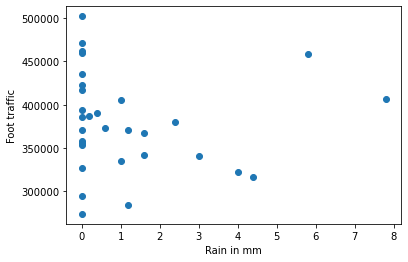

In [32]:
plt.scatter(df["total_rain"],df["total_people"])
plt.xlabel("Rain in mm")
plt.ylabel("Foot traffic")

#### Max temp clean

In [23]:
max_temp= pd.read_csv("IDCJAC0010_086338_2022_Data.csv")
min_temp= pd.read_csv("IDCJAC0011_086338_2022_Data.csv")

In [24]:
max_temp['date'] = make_date_col(max_temp)
min_temp['date'] = make_date_col(min_temp)

In [25]:
max_temp=filter_weathers(max_temp)
min_temp=filter_weathers(min_temp)

In [26]:
max_temp.rename(columns={"Maximum temperature (Degree C)":"max_temp"},inplace=True)

In [27]:
min_temp.rename(columns={"Minimum temperature (Degree C)":"min_temp"},inplace=True)

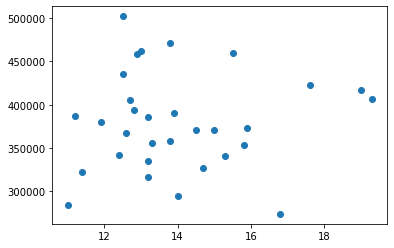

In [28]:
plt.scatter(max_temp["max_temp"],df["total_people"])


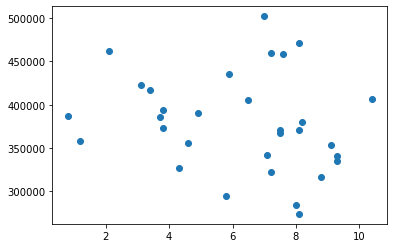

In [29]:
plt.scatter(min_temp["min_temp"],df["total_people"])

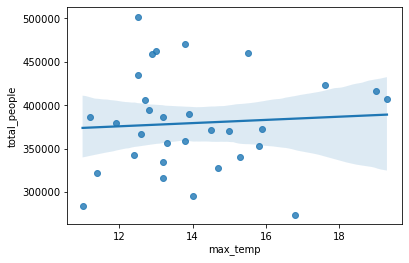

In [30]:
sns.regplot(x=max_temp["max_temp"], y=df["total_people"]);

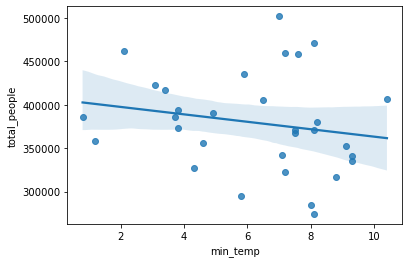

In [176]:
sns.regplot(x=min_temp["min_temp"], y=df["total_people"]);